<a href="https://colab.research.google.com/github/thais-alves-carvalho/ons_data/blob/main/api_ons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e token

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
token = {
  "usuario": "thaisac",
  "senha": "tc@esfera123"
}

In [3]:
url = 'https://integra.ons.org.br/api'

# Request

In [4]:
response = requests.post(url + '/autenticar', json=token)
response

<Response [200]>

# Get - Reservatórios 


​/hidrologia​/reservatorios

In [5]:
header = {
    'Authorization':f"bearer {response.json()['access_token']}",
    'Pagina': '1',
    'Quantidade': '240'
}

reservatorios1_response = requests.get(f'{url}/hidrologia/reservatorios', headers=header)
reservatorios1_response.json()

{'PaginaCorrente': 1,
 'QuantidadeTotalItens': 216,
 'Resultados': [{'Identificador': 'JICNST', 'NomeCurto': 'CANASTRA'},
  {'Identificador': 'PPPRNP', 'NomeCurto': 'PARANAPANEMA'},
  {'Identificador': 'AMSAPI', 'NomeCurto': 'SALTO APIACAS'},
  {'Identificador': 'SFSINC', 'NomeCurto': 'SOBRADINHO INCR'},
  {'Identificador': 'TIBAR2', 'NomeCurto': 'BARIRI ART'},
  {'Identificador': 'TIBON2', 'NomeCurto': 'B. BONITA ART'},
  {'Identificador': 'IGSEG2', 'NomeCurto': 'SEGREDO ART'},
  {'Identificador': 'IGSGJD', 'NomeCurto': 'SEGREDO+JORDAO'},
  {'Identificador': 'PBLAJ1', 'NomeCurto': 'LAJES ART'},
  {'Identificador': 'ODUSUI', 'NomeCurto': 'SUIÇA'},
  {'Identificador': 'AMUSP1', 'NomeCurto': 'PIMENTAL ART'},
  {'Identificador': 'DCSACM', 'NomeCurto': 'SANTONIO CM'},
  {'Identificador': 'IGCAPA', 'NomeCurto': 'CAPANEMA'},
  {'Identificador': 'IGDJOR', 'NomeCurto': 'DESVIO JORDÃO'},
  {'Identificador': 'IGJOR2', 'NomeCurto': 'JORDAO ART'},
  {'Identificador': 'PBPPA2', 'NomeCurto': 'PEREIR

# ENERGIA AGORA - Geracao por fonte minuto a minuto

In [6]:
header = {
    'Authorization':f"bearer {response.json()['access_token']}",
    'Pagina': '1',
    'Quantidade': '240'
}

geracaoeolica = 'Geracao_SIN_Eolica_json'
geracaohidro = 'Geracao_SIN_Hidraulica_json'
geracaonuclear = 'Geracao_SIN_Nuclear_json'
geracaosolar = 'Geracao_SIN_Solar_json'
geracaotermica = 'Geracao_SIN_Termica_json'


eolica_response = requests.get(f'{url}/energiaagora/Get/{geracaoeolica}', headers=header)
hidro_response = requests.get(f'{url}/energiaagora/Get/{geracaohidro}', headers=header)
nuclear_response = requests.get(f'{url}/energiaagora/Get/{geracaonuclear}', headers=header)
solar_response = requests.get(f'{url}/energiaagora/Get/{geracaosolar}', headers=header)
termica_response = requests.get(f'{url}/energiaagora/Get/{geracaotermica}', headers=header)

#geracao_response.json()

In [7]:
dados_eolica = eolica_response.json()
dados_hidro = hidro_response.json()
dados_nuclear = nuclear_response.json()
dados_solar = solar_response.json()
dados_termica = termica_response.json()

In [8]:
eolica_df = pd.DataFrame(dados_eolica)
hidro_df = pd.DataFrame(dados_hidro)
nuclear_df = pd.DataFrame(dados_nuclear)
solar_df = pd.DataFrame(dados_solar)
termica_df = pd.DataFrame(dados_termica)

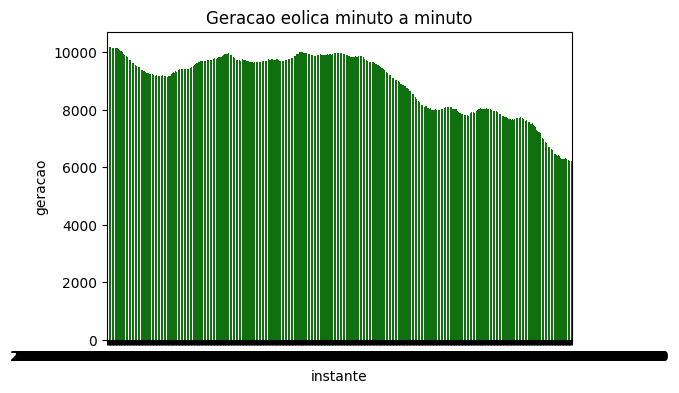

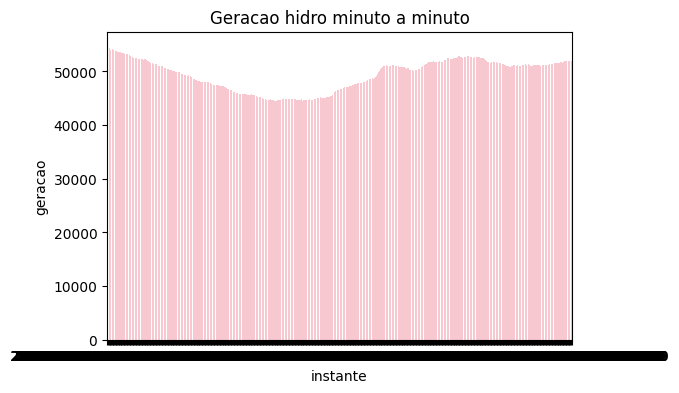

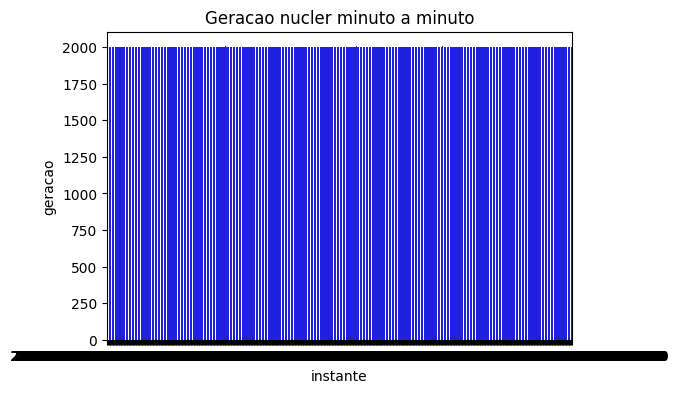

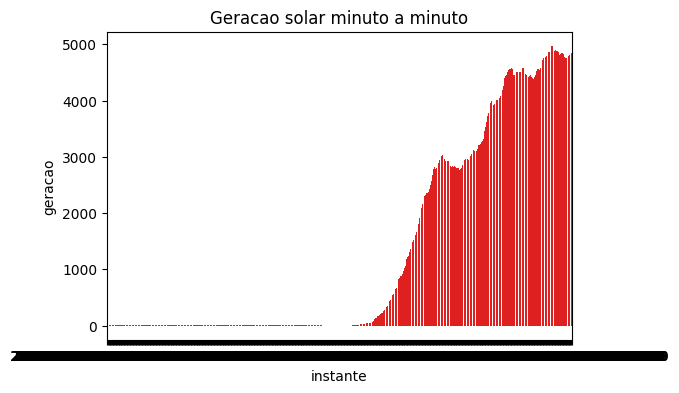

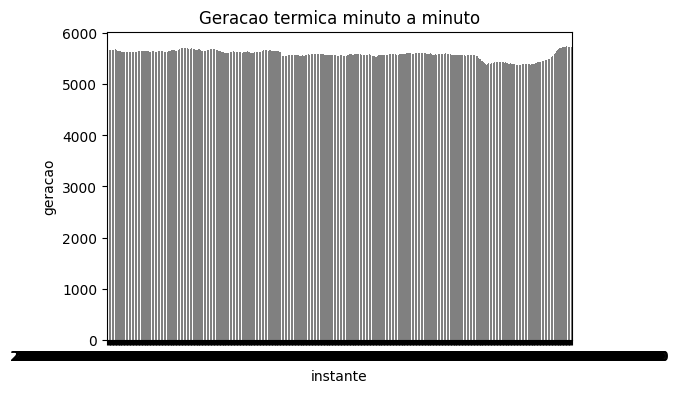

In [9]:
plt.figure(figsize=(6,4))
plt.title("Geracao eolica minuto a minuto")
ax = sns.barplot(data=eolica_df, x="instante", y="geracao", color='green')

plt.figure(figsize=(6,4))
plt.title("Geracao hidro minuto a minuto")
ax = sns.barplot(data=hidro_df, x="instante", y="geracao", color='pink')

plt.figure(figsize=(6,4))
plt.title("Geracao nucler minuto a minuto")
ax = sns.barplot(data=nuclear_df, x="instante", y="geracao", color='blue')

plt.figure(figsize=(6,4))
plt.title("Geracao solar minuto a minuto")
ax = sns.barplot(data=solar_df, x="instante", y="geracao", color='red')

plt.figure(figsize=(6,4))
plt.title("Geracao termica minuto a minuto")
ax = sns.barplot(data=termica_df, x="instante", y="geracao", color='gray')





# ENERGIA AGORA - Carga minuto a minuto

API de carga possui os seguintes arquivos json 


*   'Carga_SIN_json'
*   'Carga_Nordeste_json'
*   'Carga_Norte_json'
*   'Carga_SudesteECentroOeste_json'
*   'Carga_Sul_json' 

A seguir será apresentado o exemplo usando apenas a carga do SIN

In [10]:
header = {
    'Authorization':f"bearer {response.json()['access_token']}",
    'Pagina': '1',
    'Quantidade': '240'
}

carga = 'Carga_SIN_json'


carga_response = requests.get(f'{url}/energiaagora/Get/{carga}', headers=header)
dados_carga = carga_response.json()
carga_df = pd.DataFrame(dados_carga)
carga_df.head()


,instante,carga
0,2023-04-11T00:00:00-03:00,70062.1100
1,2023-04-11T00:01:00-03:00,69950.9800
2,2023-04-11T00:02:00-03:00,69926.0400
3,2023-04-11T00:03:00-03:00,69687.7500
4,2023-04-11T00:04:00-03:00,69486.7344


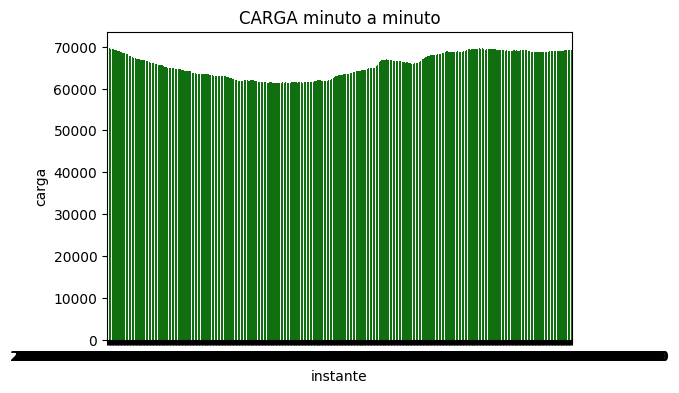

In [11]:
plt.figure(figsize=(6,4))
plt.title("CARGA minuto a minuto")
ax = sns.barplot(data=carga_df, x="instante", y="carga", color='green')

# Energia agora 

 /energiaagora/Get/SituacaoDosReservatorios

In [12]:
header = {
    'Authorization':f"bearer {response.json()['access_token']}",
    'Pagina': '1',
    'Quantidade': '240'
}

reservatorios_response = requests.get(f'{url}/energiaagora/Get/SituacaoDosReservatorios', headers=header)
reservatorios_response.json()

[{'Data': '2023-04-09T00:00:00',
  'Subsistema': 'Norte',
  'Bacia': 'AMAZONAS',
  'Reservatorio': 'BALBINA',
  'ReservatorioMax': 785.737,
  'ReservatorioEARVerificadaMWMes': 638.482,
  'ReservatorioEARVerificadaPorcentagem': 81.259,
  'ReservatorioValorUtil': 82.76,
  'ReservatorioPorcentagem': 5.13,
  'BaciaMax': 2028.231,
  'BaciaEARVerificadaMWMes': 1581.289,
  'BaciaEARVerificadaPorcentagem': 77.9639,
  'BaciaPorcentagem': 5.32,
  'SubsistemaMax': 15302.3965,
  'SubsistemaEARVerificadaMWMes': 15063.1152,
  'SubsistemaValorUtil': 98.4363,
  'SINMax': 292068.2,
  'SINEARVerificadaMWMes': 253137.672,
  'SINEARPorcentagem': 0.8667074},
 {'Data': '2023-04-09T00:00:00',
  'Subsistema': 'Norte',
  'Bacia': 'TOCANTINS',
  'Reservatorio': 'TUCURUI',
  'ReservatorioMax': 7721.097,
  'ReservatorioEARVerificadaMWMes': 7673.098,
  'ReservatorioEARVerificadaPorcentagem': 99.3783,
  'ReservatorioValorUtil': 99.46,
  'ReservatorioPorcentagem': 50.46,
  'BaciaMax': 49880.6055,
  'BaciaEARVerifica

In [14]:
reservatorios_response.json()

[{'Data': '2023-04-09T00:00:00',
  'Subsistema': 'Norte',
  'Bacia': 'AMAZONAS',
  'Reservatorio': 'BALBINA',
  'ReservatorioMax': 785.737,
  'ReservatorioEARVerificadaMWMes': 638.482,
  'ReservatorioEARVerificadaPorcentagem': 81.259,
  'ReservatorioValorUtil': 82.76,
  'ReservatorioPorcentagem': 5.13,
  'BaciaMax': 2028.231,
  'BaciaEARVerificadaMWMes': 1581.289,
  'BaciaEARVerificadaPorcentagem': 77.9639,
  'BaciaPorcentagem': 5.32,
  'SubsistemaMax': 15302.3965,
  'SubsistemaEARVerificadaMWMes': 15063.1152,
  'SubsistemaValorUtil': 98.4363,
  'SINMax': 292068.2,
  'SINEARVerificadaMWMes': 253137.672,
  'SINEARPorcentagem': 0.8667074},
 {'Data': '2023-04-09T00:00:00',
  'Subsistema': 'Norte',
  'Bacia': 'TOCANTINS',
  'Reservatorio': 'TUCURUI',
  'ReservatorioMax': 7721.097,
  'ReservatorioEARVerificadaMWMes': 7673.098,
  'ReservatorioEARVerificadaPorcentagem': 99.3783,
  'ReservatorioValorUtil': 99.46,
  'ReservatorioPorcentagem': 50.46,
  'BaciaMax': 49880.6055,
  'BaciaEARVerifica

# Get - Grandezas verificadas

/hidrologia/reservatorios/{Identificador}/afluencia

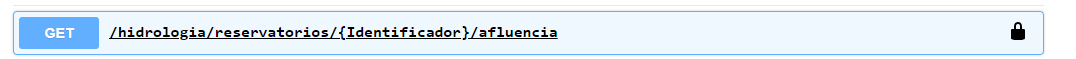

In [13]:
grandezas_hidrologicas_params = dict(
  Pagina= "1",
  Quantidade= "10",  
  IDPostoReservatorio= "GRFURN",
  Grandeza= "AFL",
  DataInicialMedicao="10/03/2023",
  DataFinalMedicao="14/03/2023",
  QualidadeDado="COO",
  AgregacaoTemporal= "DI"
)